/Users/nathanieltornow/qvm-projects/qvm/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


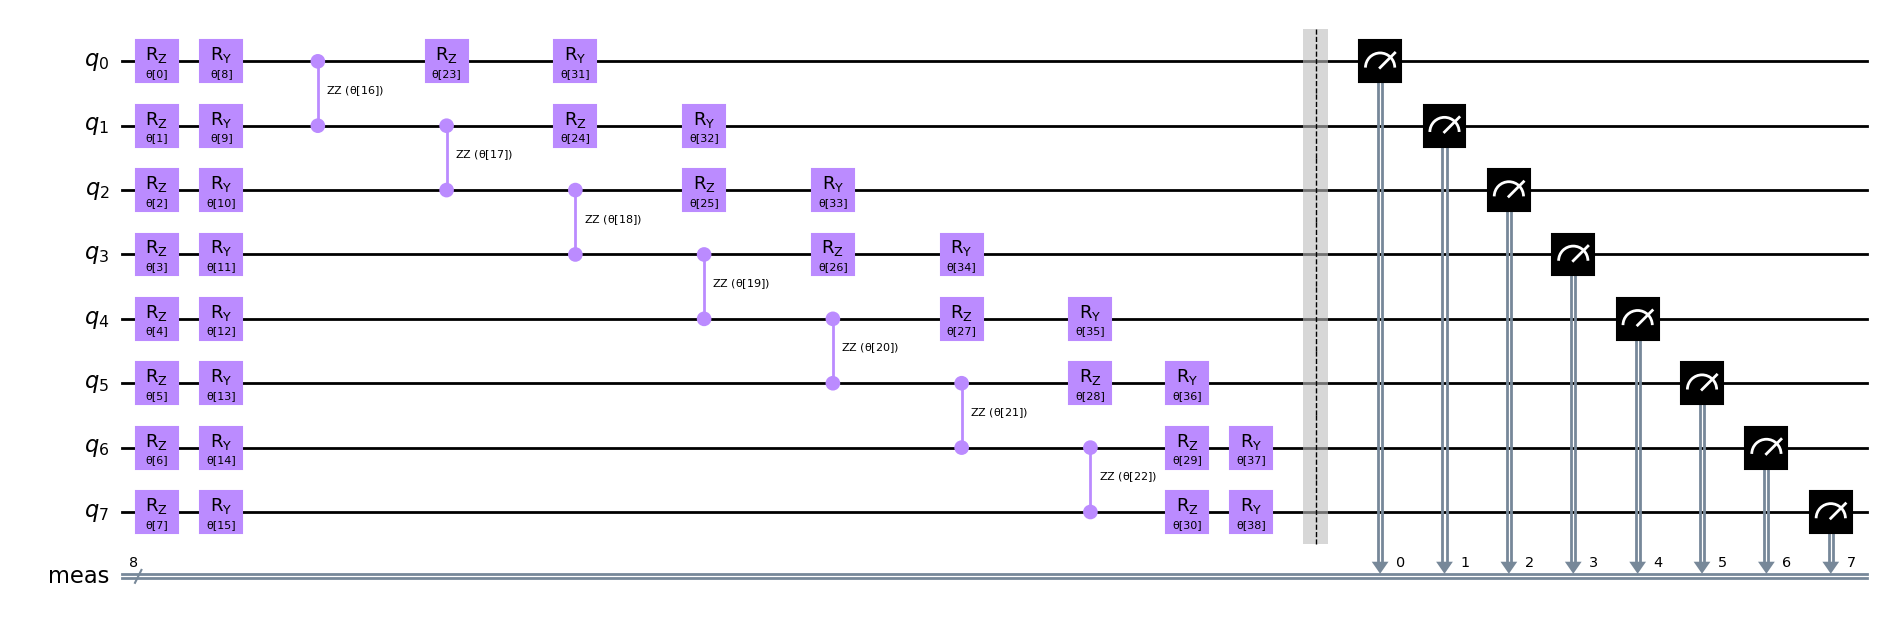

In [19]:
import numpy as np
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import TwoLocal
from qiskit_aer import AerSimulator

from qvm.runtime.runner import expval_from_counts, sample_fragments
from qvm.runtime.runners import SimRunner
from qvm.runtime.virtualizer import build_tensornetwork
from qvm.cutter.metis import MetisQubitGraphCutter
from qvm.virtual_circuit import VirtualCircuit


circuit = TwoLocal(
    8,
    rotation_blocks=["rz", "ry"],
    entanglement_blocks="rzz",
    entanglement="linear",
    reps=1,
).decompose()
circuit.measure_all()


params = {param: np.random.randn() / 2 for param in circuit.parameters}

circuit.draw("mpl", fold=-1)

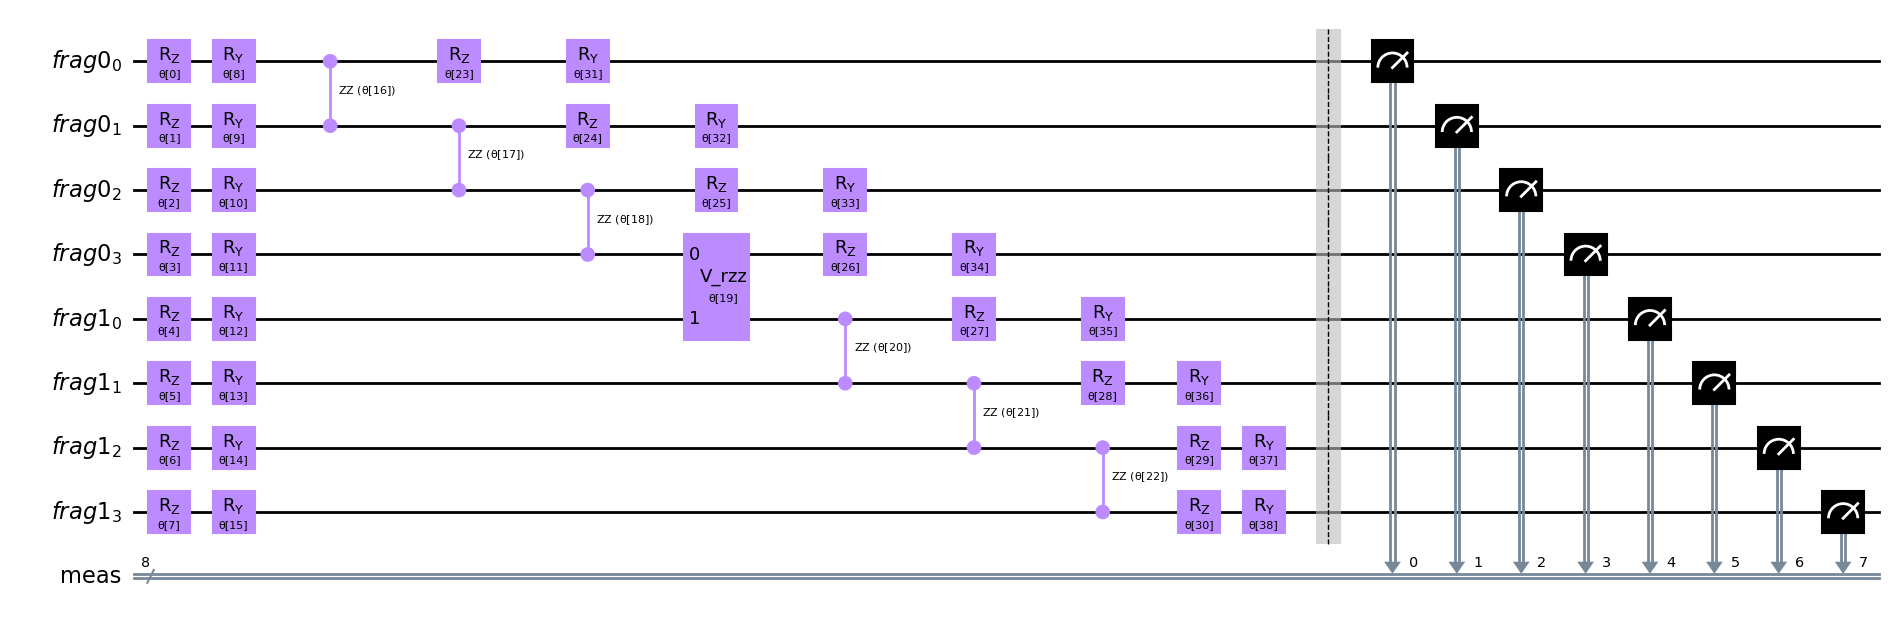

In [20]:
cut_circuit = MetisQubitGraphCutter(2).run(circuit)
cut_circuit.draw("mpl", fold=-1)

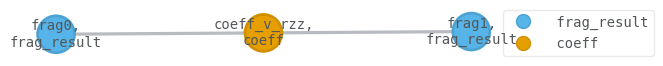

In [21]:
cut_circuit = cut_circuit.assign_parameters(params)

virtual_circuit = VirtualCircuit(cut_circuit)

results = sample_fragments(virtual_circuit, SimRunner(), shots=100000)

tn = build_tensornetwork(virtual_circuit, results)
tn.draw(color=["frag_result", "coeff"])

In [22]:
result = tn.contract(all, optimize="auto-hq")

In [23]:
circuit = circuit.assign_parameters(params)

counts = AerSimulator().run(circuit, shots=100000).result().get_counts()
print(abs(tn.contract() - expval_from_counts(counts)))

0.001636116299629231
